# Sentiment analysis

In [3]:
import pandas as pd
import numpy as np
from icecream import ic
import datetime
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt
import glob

In [4]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates, if_bg=False):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%d-%b")
        ax1.xaxis.set_major_formatter(date_form)
    if if_bg:
        plt.axhspan(0, 1, color = "green", facecolor='0.2', alpha=0.1)
        plt.axhspan(0, -1, color = "red", facecolor='0.2', alpha=0.1)

    ax1.set(ylim=(0, None))
    
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

def set_late_barplot_settings():
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)
        
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

In [5]:
from ast import literal_eval

df = pd.read_csv(glob.glob("../hope-keyword-templates/coronapas_smoothed*.csv")[0], converters={"tokens_list": literal_eval}, dtype={"tokens_string": str})
ic(len(df))

df = df.sort_values("created_at")
df.head()

ic| len(df): 8104


,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,tokens_string,centered_compound,day,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets
0,66,2020-12-02 19:53:01,1.334224e+18,Oldies planlægger aaaaalle de steder de skal r...,['coronapas'],2020-12-02,Oldies planlægger aaaaalle de steder de skal r...,Oldies planlægger aaaaalle de steder de skal r...,False,0.000,...,oldies planlægge aaaaalle sted rejse vaccinere...,-0.075669,2020-12-02,0.000000,0.000000,-0.766486,0.057670,34.935648,0.080753,89.520914
1,67,2020-12-04 08:28:20,1.334777e+18,"Hvordan ville fodboldfan have det med, hvis ma...",['coronapas'],2020-12-04,"Hvordan ville fodboldfan have det med, hvis ma...","Hvordan ville fodboldfan have det med, hvis ma...",False,0.000,...,fodboldfan fremvise coronapas dokumentation va...,-0.075669,2020-12-04,2.079442,0.408463,-0.358023,0.058008,35.307895,0.080802,89.592420
2,69,2020-12-04 09:08:39,1.334787e+18,@Theberggrens Vil efterhånden ligge min ene ny...,['coronapas'],2020-12-04,"Vil efterhånden ligge min ene nyre i pant, fo...","Vil efterhånden ligge min ene nyre i pant, fo...",False,0.123,...,efterhånden ligge nyre pant stadion coronapas,-0.315969,2020-12-04,2.079442,0.408463,-0.358023,0.058345,35.683978,0.080851,89.663467
3,70,2020-12-04 11:15:53,1.334819e+18,"@bdk1312 Det er selvfølgelig helt fair, men je...",['coronapas'],2020-12-04,"Det er selvfølgelig helt fair, men jeg tror i...","Det er selvfølgelig helt fair, men jeg tror i...",False,0.137,...,selvfølgelig fair tro fysisk coronapas chance ...,-0.372369,2020-12-04,2.079442,0.408463,-0.358023,0.058683,36.063918,0.080900,89.734051
4,71,2020-12-04 11:25:24,1.334821e+18,@bdk1312 @CopenhagenDroid Jeg tror helt sikker...,['coronapas'],2020-12-04,Jeg tror helt sikkert alle aktører i fodbold...,Jeg tror helt sikkert alle aktører i fodbold...,False,0.058,...,tro sikker aktør fodboldverdenen ønske eventue...,-0.245269,2020-12-04,2.079442,0.408463,-0.358023,0.059020,36.447733,0.080949,89.804171


In [6]:
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
df["date"] = pd.to_datetime(df["date"])

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


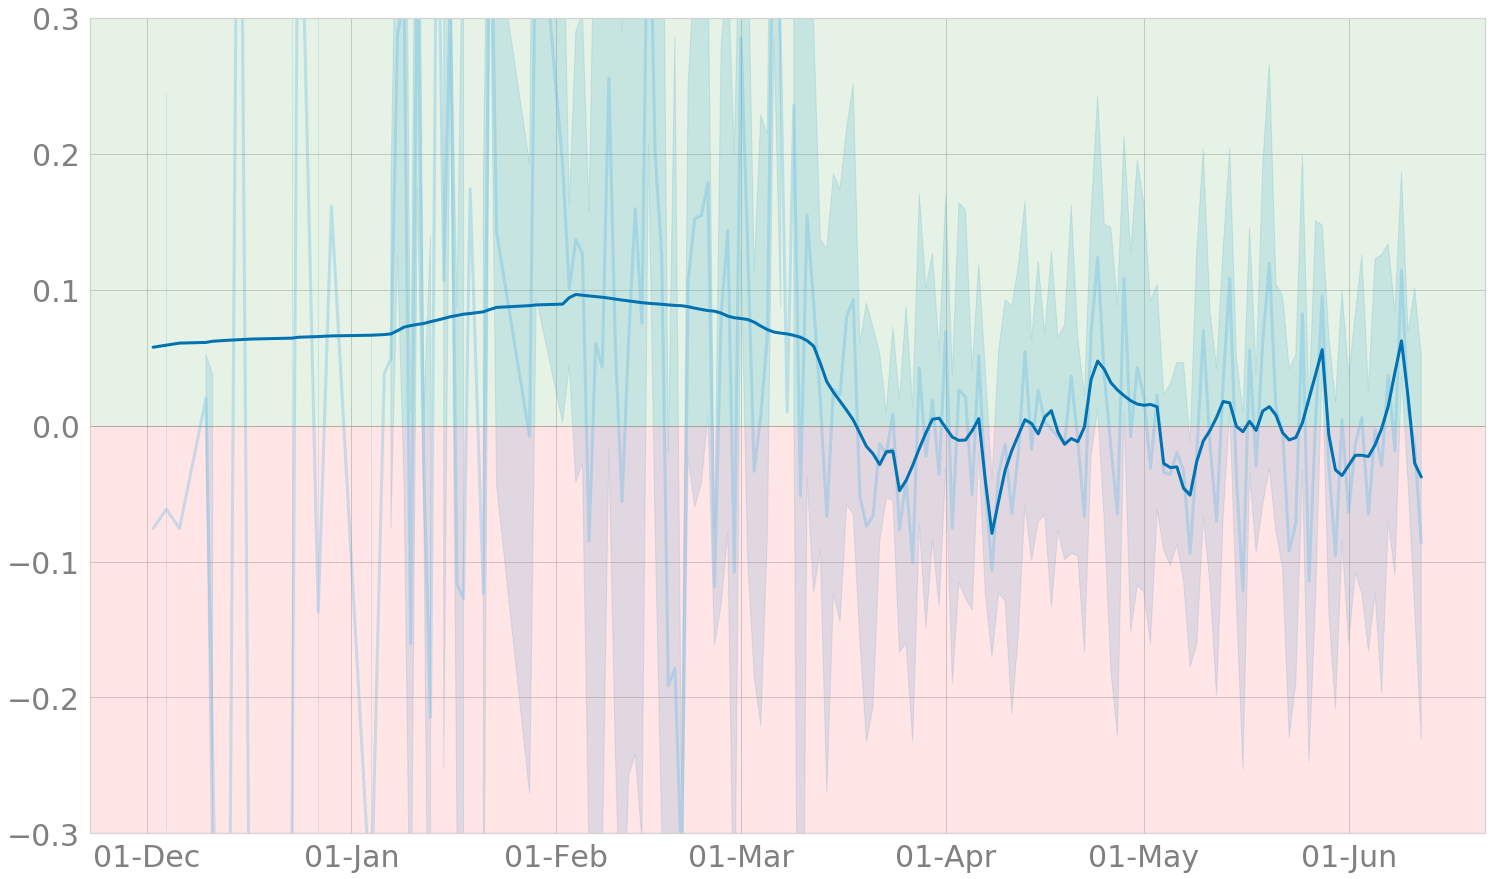

In [10]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[2],
                   alpha = 0.30,
                   linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="s200_compound",  
                   color = palette[5],
                     linewidth = 3, data = df)

fig, ax1 = set_late_plot_settings(if_dates = True, if_bg = True)

ax1.set(ylim=(-0.3, 0.3))

plot_name = "fig/sentiment_compound_winter.png"
#fig.savefig(plot_name)

fig.show()

In [11]:
# Add important dates as scatterplot
# coronapas specific
dates = ["2021-02-03",
         "2021-03-23",
    "2021-04-06","2021-04-16",
    "2021-05-18"]
labels = ["First mention",
          "Plan to return to normal",
    "Hairdressers reopen","Restaurants reopen",
    "Denmark's reopening plan"]

dates_df = df[df["date"].isin(dates)]

In [12]:
dates_df = dates_df.groupby("date").mean().reset_index()
dates_df["labels"] = labels
dates_df["date"] = pd.to_datetime(dates_df["date"])
dates_df["date1"] = pd.DatetimeIndex(dates_df.date) + pd.DateOffset(1)

pos_dates_df = dates_df[0:2]
neg_dates_df = dates_df[2:].reset_index(drop=True)

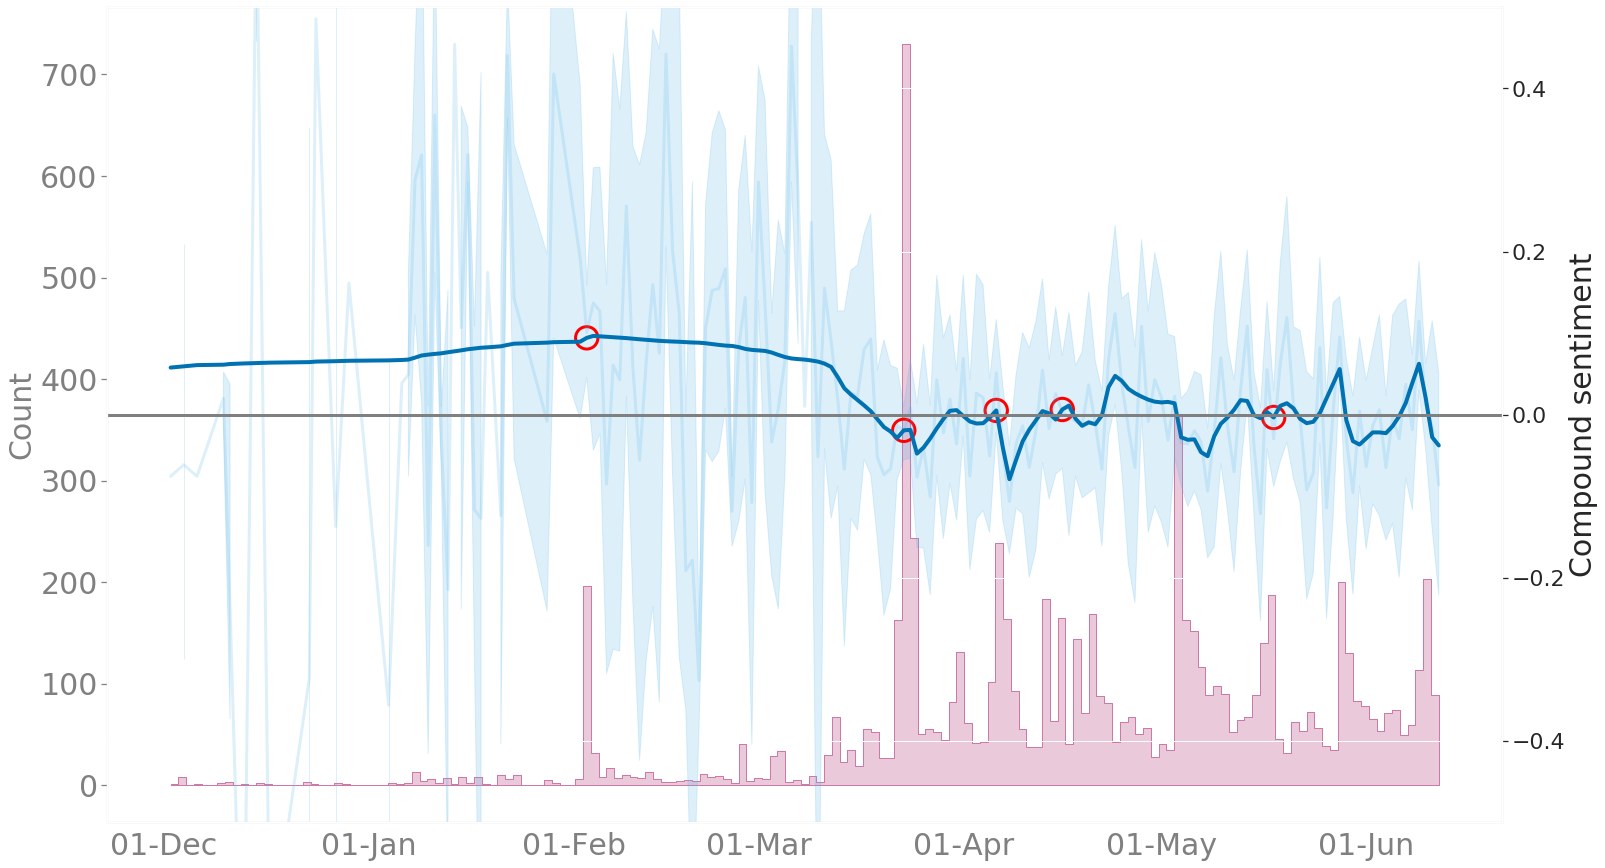

In [23]:
fig, ax0, palette = set_base_plot_settings(fontsize=30, if_palette = True)

yaxis = "s200_compound"

ax0 = sns.histplot(x="date", alpha = 0.4,
                   color = palette[7],
                   bins = len(df["date"].unique()), element="step",
                  data = df)

ax1 = ax0.twinx()

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[2],
                   alpha = 0.20,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y=yaxis, 
                   color = palette[5],
                     linewidth = 4, data = df)

x_coordinates = dates_df["date"]
y_coordinates = dates_df[yaxis]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

#for i in range(pos_dates_df.shape[0]):
#    plt.text(x = pos_dates_df.date1[i], y = pos_dates_df[yaxis][i]+0.007,
#             s = pos_dates_df.labels[i],
#             fontdict = dict(color=palette[0],size=25),
#             bbox = dict(facecolor="white",alpha=0.5))
    
#for i in range(neg_dates_df.shape[0]):
#    plt.text(x = neg_dates_df.date1[i], y = neg_dates_df[yaxis][i]-0.014,
#             s = neg_dates_df.labels[i],
#             fontdict = dict(color=palette[0],size=25),
#             bbox = dict(facecolor="white",alpha=0.5))#palette[3]
    
#plt.axvline(dt.datetime(2021, 1, 1), color="grey")
plt.axhline(0, color="grey", linewidth = 3)

ax1.set(xlabel="", ylabel = "Compound sentiment")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax0.set(xlabel="", ylabel = "Count")
ax0.xaxis.get_label().set_fontsize(30)
ax0.yaxis.get_label().set_fontsize(30)

themes.theme_minimal(grid=False, ticks=False, fontsize=30)

#ax1.grid(linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)

ax1.set(ylim=(-0.5, 0.5))

plot_name = "fig/sentiment_compound_mentions_count_labelled.png"
fig.savefig(plot_name, bbox="tight", dpi=300)

fig.show()

ValueError: Could not interpret value `s200_entropy` for parameter `y`

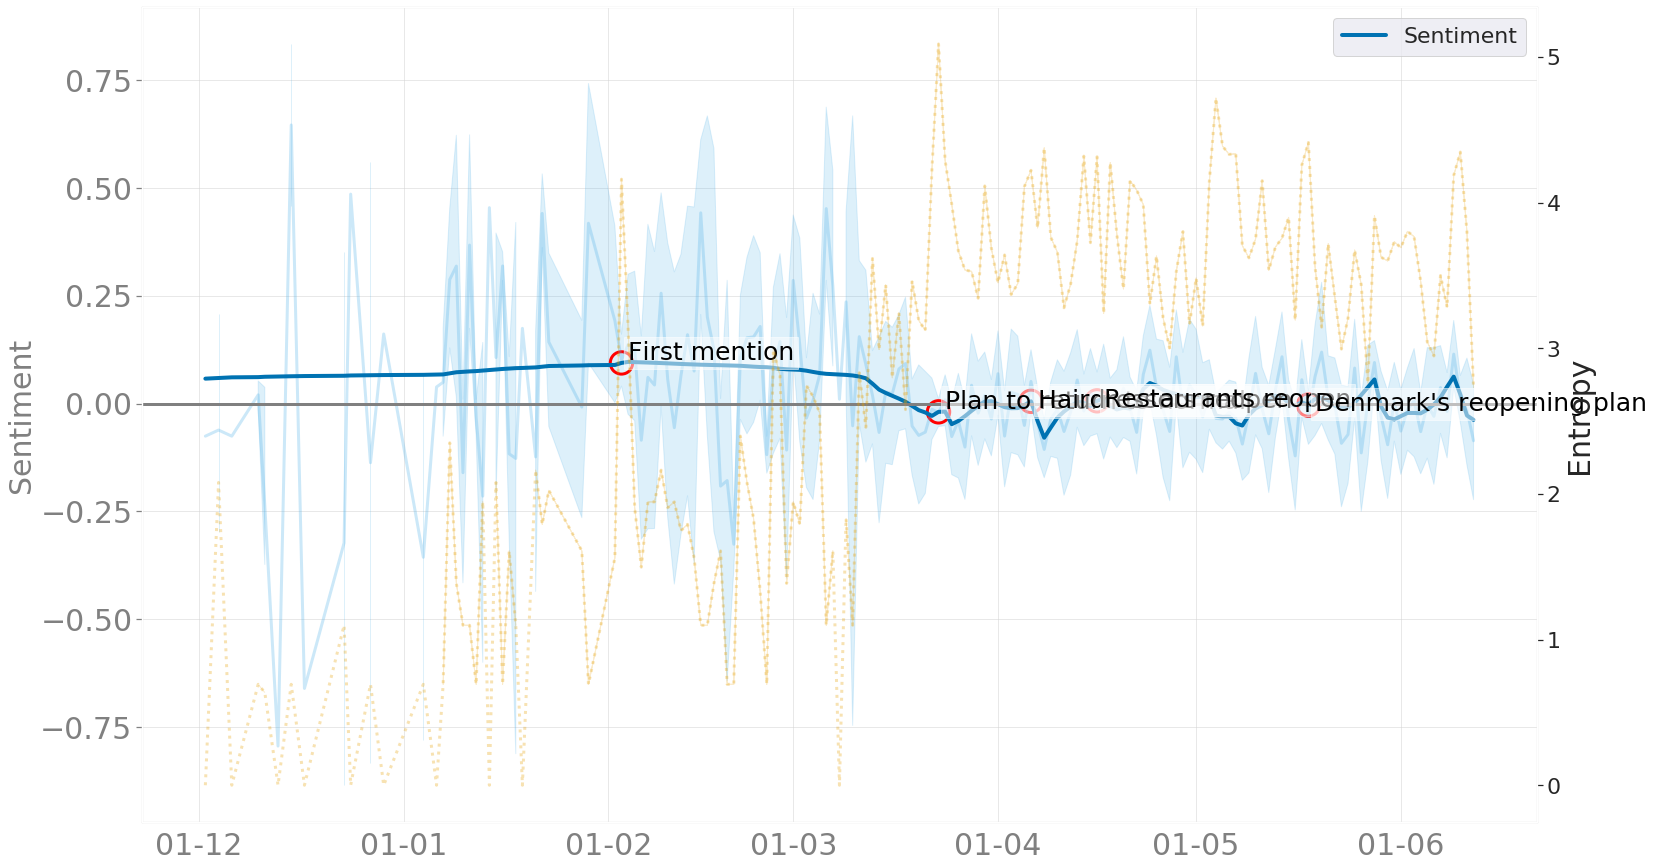

In [17]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ycom = "s200_compound"
yent = "s200_entropy"

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   #label="", 
                   color = palette[2],
                   alpha = 0.30,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y=ycom, 
                   label="Sentiment", 
                   color = palette[5],
                     linewidth = 4, data = df)

x_coordinates = dates_df["date"]
y_coordinates = dates_df[ycom]

plt.scatter(x_coordinates, y_coordinates, color="none", edgecolor="red",
           s = 500, linewidths = 3) 

for i in range(pos_dates_df.shape[0]):
    plt.text(x = pos_dates_df.date1[i], y = pos_dates_df[ycom][i]+0.007,
             s = pos_dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))
    
for i in range(neg_dates_df.shape[0]):
    plt.text(x = neg_dates_df.date1[i], y = neg_dates_df[ycom][i]-0.014,
             s = neg_dates_df.labels[i],
             fontdict = dict(color=palette[0],size=25),
             bbox = dict(facecolor="white",alpha=0.5))#palette[3]
    
#plt.axvline(dt.datetime(2021, 1, 1), color="grey")
plt.axhline(0, color="grey", linewidth = 3)

# Color the bg
#plt.axhspan(0, 0.15, color = "green", facecolor='0.2', alpha=0.1)
#plt.axhspan(0, -0.15, color = "red", facecolor='0.2', alpha=0.1)


# 'solid', 'dashed', 'dashdot', 'dotted'
ax2 = ax1.twinx()
ax2 = sns.lineplot(x="date", y="entropy", 
                   #label="Daily", 
                   color = palette[1],
                   alpha = 0.30,
                     linewidth = 3, 
                   linestyle = "dotted",
                   data = df)


ax1.set(xlabel="", ylabel = "Sentiment")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax2.set(xlabel="", ylabel = "Entropy")
ax2.xaxis.get_label().set_fontsize(30)
ax2.yaxis.get_label().set_fontsize(30)

ax1.grid(linestyle='-', linewidth=0.5, which= "both")
ax2.grid(False)

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

ax2 = sns.lineplot(x="date", y=yent, 
                   label="Entropy", 
                   color = palette[6],
                   #alpha = 0.30,
                   linestyle = "dotted",
                     linewidth = 5, data = df)

ax1.legend(loc=2)
plt.legend(markers, numpoints=1)

ax2.legend(loc=1)

plot_name = "fig/sentiment_compound_entropy_labelled.png"
fig.savefig(plot_name)

fig.show()